In [1]:
# https://financedata.github.io/posts/finance-data-reader-users-guide.html 
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 3.9 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
fdr.__version__

'0.9.33'

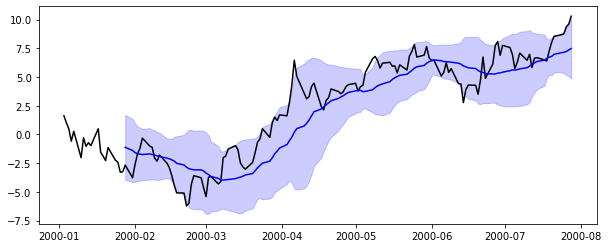

In [3]:
# Pandas: Bollinger Bands(Example)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-directly-with-matplotlib

np.random.seed(1)
price = pd.Series(
    np.random.randn(150).cumsum(),
    index=pd.date_range("2000-1-1", periods=150, freq="B"),
)
ma_20 = price.rolling(20).mean()
ma_20_std = price.rolling(20).std()
plt.figure(figsize=(10, 4))
plt.plot(price.index, price, "k")
plt.plot(ma_20.index, ma_20, "b")
plt.fill_between(ma_20_std.index, ma_20 - 2 * ma_20_std, ma_20 + 2 * ma_20_std, color="b", alpha=0.2)

In [4]:
df = fdr.DataReader("005930", "2020")
df.tail(10)  

# 삼성전자: 005930
# 현대차: 005380
# 엔씨소프트: 036570
# 셀트리온: 068270
# 한국항공우주: 047810
# LG에너지솔루션: 373220
# 카카오: 035720
# S-Oil: 010950
# 고려아연: 010130
# 롯데쇼핑: 023530
# CJ제일제당: 097950
# HMM: 011200
# 두산에너빌리티: 034020
# 삼성생명: 032830

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-05-02,66600,67600,66500,67300,14106184,-0.001484
2022-05-03,67400,68400,67300,67500,14168875,0.002972
2022-05-04,68000,68400,67500,67900,11505248,0.005926
2022-05-06,67000,67100,66500,66500,14356156,-0.020619
2022-05-09,66300,66900,66100,66100,11858736,-0.006015
2022-05-10,65900,66300,65300,65700,17235605,-0.006051
2022-05-11,65500,66300,65200,65700,12330920,0.000000
2022-05-12,65200,65500,64900,64900,16414188,-0.012177
2022-05-13,65300,66700,65200,66500,14551536,0.024653


In [5]:
df.shape

(586, 6)

In [6]:
df["MA_20"] = df["Close"].rolling(20).mean()

In [7]:
df["Close"].describe()

count      586.000000
mean     68636.348123
std      11710.876732
min      42500.000000
25%      58400.000000
50%      70500.000000
75%      79375.000000
max      91000.000000
Name: Close, dtype: float64

In [8]:
df["MA_20_STD"] = df["Close"].rolling(20).std()
df["UpperBand"] = df["MA_20"] + (df["MA_20_STD"] * 2)
df["LowerBand"] = df["MA_20"] - (df["MA_20_STD"] * 2)
df.head(30) 

,Open,High,Low,Close,Volume,Change,MA_20,MA_20_STD,UpperBand,LowerBand
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN
2020-01-09,58400,58600,57400,58600,24102579,0.031690,NaN,NaN,NaN,NaN
2020-01-10,58800,59700,58300,59500,16000170,0.015358,NaN,NaN,NaN,NaN
2020-01-13,59600,60000,59100,60000,11359139,0.008403,NaN,NaN,NaN,NaN
2020-01-14,60400,61000,59900,60000,16906295,0.000000,NaN,NaN,NaN,NaN


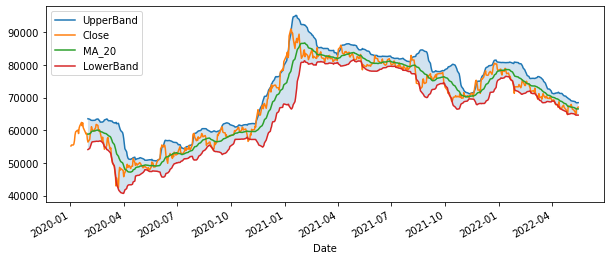

In [9]:
df[["UpperBand", "Close", "MA_20", "LowerBand"]].plot(figsize=(10,4))
g = plt.fill_between(df.index, df.LowerBand, df.UpperBand, alpha=0.2)

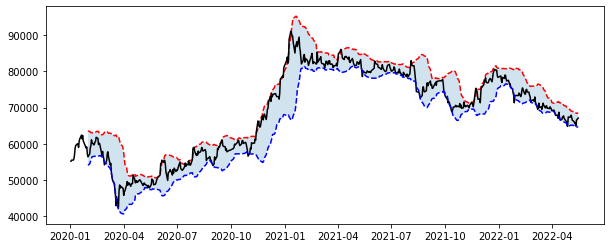

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df.UpperBand, "r--")
plt.plot(df.index, df.Close, "k")
plt.plot(df.index, df.LowerBand, "b--")
plt.fill_between(df.index, df.UpperBand, df.LowerBand, alpha=0.2)

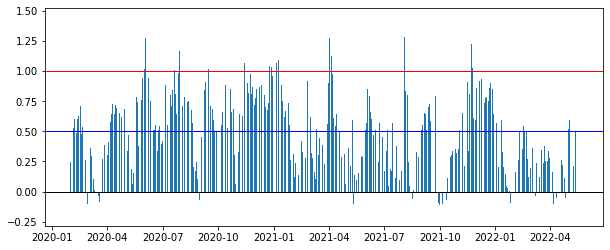

In [11]:
df["PercentBand"] = (df["Close"] - df["LowerBand"]) / (df["UpperBand"] - df["LowerBand"])

plt.figure(figsize=(10, 4))
plt.bar(df.index, df["PercentBand"])
plt.axhline(1, c="r", lw=1)
plt.axhline(0.5, c="b", lw=1)
plt.axhline(0, c="k", lw=1)

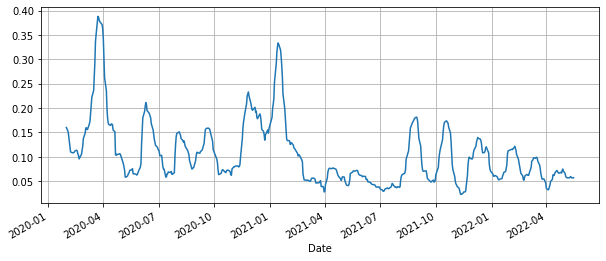

In [12]:
df["BandWidth"] = (df["UpperBand"] - df["LowerBand"]) / df["MA_20"]

g = df["BandWidth"].plot(figsize=(10, 4), grid=True)

In [13]:
df.tail(10)

,Open,High,Low,Close,Volume,Change,MA_20,MA_20_STD,UpperBand,LowerBand,PercentBand,BandWidth
Date,,,,,,,,,,,,
2022-05-02,66600,67600,66500,67300,14106184,-0.001484,67210.0,1104.488450,69418.976901,65001.023099,0.520371,0.065734
2022-05-03,67400,68400,67300,67500,14168875,0.002972,67125.0,1004.136183,69133.272366,65116.727634,0.593364,0.059837
2022-05-04,68000,68400,67500,67900,11505248,0.005926,67095.0,969.250932,69033.501863,65156.498137,0.707635,0.057784
2022-05-06,67000,67100,66500,66500,14356156,-0.020619,67020.0,953.442516,68926.885032,65113.114968,0.363652,0.056905
2022-05-09,66300,66900,66100,66100,11858736,-0.006015,66935.0,956.019709,68847.039418,65022.960582,0.281647,0.057131
2022-05-10,65900,66300,65300,65700,17235605,-0.006051,66825.0,965.660396,68756.320792,64893.679208,0.208749,0.057802
2022-05-11,65500,66300,65200,65700,12330920,0.000000,66760.0,996.520261,68753.040523,64766.959477,0.234075,0.059708
2022-05-12,65200,65500,64900,64900,16414188,-0.012177,66570.0,969.047280,68508.094561,64631.905439,0.069164,0.058227
2022-05-13,65300,66700,65200,66500,14551536,0.024653,66520.0,944.011597,68408.023193,64631.976807,0.494703,0.056766


In [14]:
def plot_Bollinger_Bands(df, n=20, k=2):
    plt.style.use("seaborn-whitegrid")
    df["MA_20"] = df["Close"].rolling(20).mean()
    df["MA_20_STD"] = df["Close"].rolling(20).std()
    df["UpperBand"] = df["MA_20"] + (df["MA_20_STD"] * 2)
    df["LowerBand"] = df["MA_20"] - (df["MA_20_STD"] * 2)
    df = df[19:].copy()
    
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df.UpperBand, "r--", label="UpperBand")
    plt.plot(df.index, df.Close, "k")
    plt.plot(df.index, df.LowerBand, "b--", label="LowerBand")
    plt.plot(df.index, df.MA_20)
    plt.fill_between(df.index, df.UpperBand, df.LowerBand, alpha=0.2)
    plt.legend(loc="best")
    plt.title("Bollinger Bands")

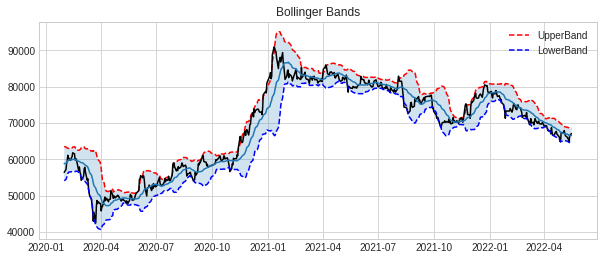

In [15]:
plot_Bollinger_Bands(df)

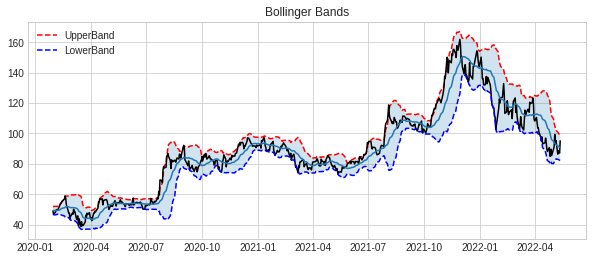

In [16]:
AMD = fdr.DataReader("AMD", "2020")
plot_Bollinger_Bands(AMD)

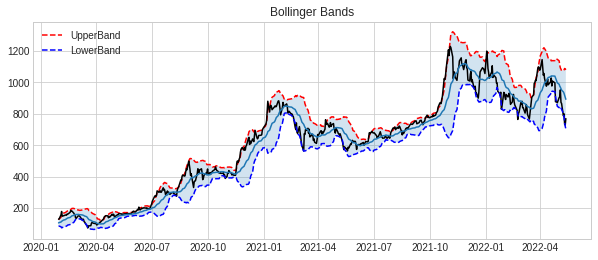

In [17]:
TESLA = fdr.DataReader("TSLA", "2020")
plot_Bollinger_Bands(TESLA)

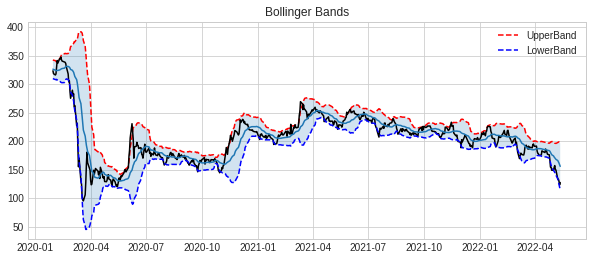

In [18]:
Boeing = fdr.DataReader("BA", "2020")
plot_Bollinger_Bands(Boeing)

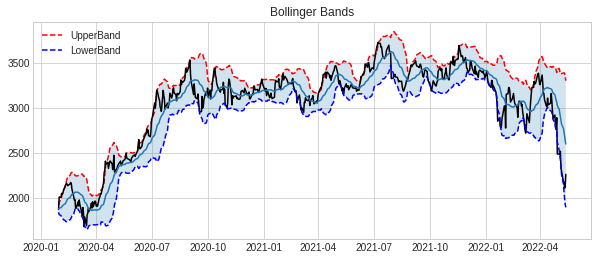

In [19]:
amazon = fdr.DataReader("AMZN", "2020")
plot_Bollinger_Bands(amazon)